# Probability is fun

## Introduction

Your Office has organise a game where each participant has to withdraw a ball in a sack. There is total 5 balls, 3 red and 2 blue. Each participant has to withdraw one ball, note down the colour and put it back. Repeat the same experiment 4 times.

The fun part is, if Participant get 4 red balls, he/she will get 150 Rs as reward and if he/she get any other combination, loose the game and pay 10 Rs fine.

Now question is, If this game is played with n number of players, who do you think make money? Players or Office Event Organiser(House)?

This notebook will help you analyse how to make sure that Event Organiser(House) always win the game and make money.


### Set up

In [61]:
#import libraries
from scipy.stats import binom 
import matplotlib.pyplot as plt
n=4 #number of trail
amount_to_win=150 #Reward amount to Pay to Player who get all 4 red balls
#67.2 to no loss no benefit
amount_to_loose=-10 # Fine Amount paid by Player in case if they don't get 4 red balls
totoal_balls=5 # Total number of balls in bag
red_ball=3 # total number of red balls in bag
blue_ball=2 # total number of blue balls in bag

### Probability Distribution

In [62]:
def prob_calculator(sample,totalSample):
    """ Calculate Probability of event
    
    Args:
    sample(int) : integer sample value
    totalSample(int): integer total Sample Count
    
    Returns:
    float probability value of event to be happen
    """
    return sample/totalSample

In [63]:
#calculate prob of red balls
prob_red_ball=prob_calculator(red_ball,totoal_balls)
print("probability is "+ str(prob_red_ball))

probability is 0.6


In [64]:
n=n # Total number of Trial
p = prob_red_ball #Prob of Event in this case probability of red balls
# defining the list of r values, number of red balls in each experiment 
r_values = list(range(n + 1)) 

#scipy.stats.binom.pmf() function is used to obtain the probability mass function for a certain value of r, n and p. 
#Bionomial distribution of getting P(r) in n trials
dist = [binom.pmf(r, n, p).round(5) for r in r_values ] 

# printing the table 
print("r\tp(r)") 
for i in range(n + 1): 
    print(str(r_values[i]) + "\t" + str(dist[i])) 


r	p(r)
0	0.0256
1	0.1536
2	0.3456
3	0.3456
4	0.1296


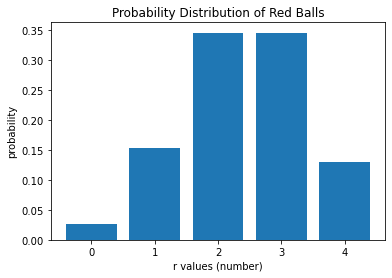

In [65]:
#plotting the bar
plt.bar(r_values, dist) 
plt.ylabel('probability')
plt.xlabel('r values (number)')
plt.title('Probability Distribution of Red Balls')
plt.show()

In [66]:
"""
Cumulative probabiility
    P(r<=3):
    all the probabilities value where number of balls were 3 or less than 3
    P(r<=3=P(r=0)+P(r=1)+P(r=2)+P(r=3)
"""

prob_of_3_or_less_than_3_red_balls=sum(dist[:4]).round(5)
print('probability of getting 3 or less than 3 red balls :'+str(prob_of_3_or_less_than_3_red_balls))

probability of getting 3 or less than 3 red balls :0.8704


In [67]:
"""
Cumulative probabiility
    P(r=4):
    all the probabilities value where number of red balls were 4
    P(r=4)=P(r=4) i.e 0.1296
"""
prob_of_4_red_balls=dist[len(dist)-1]
print('probability of getting 4 red balls :'+str(prob_of_4_red_balls))

probability of getting 4 red balls :0.1296


### Expected Value Calculation

In [68]:
"""
Expected value (EV):

    The expected value should be interpreted as the average value you get after the experiment has been conducted 
    an infinite number of times.    
      
    Expected Value of Money won by one Game
    P(X=150)=>P(4 red balls)=>P(r=4)
    P(X=-10)=>P(0,1,2,3 red balls)=>p(r<=3)
    EV(X)=x1*P(X=x1)+x2*P(X=x2)+...

    EV=amount_to_loose*P(r<=3)+amount_to_win*P(r=4)
    
    Expected value of money won by player in one game
    
    (+EV)- On on average money won by Player
    (-EV) - On an average money won by House (Event Organiser)
"""
def calculate_EV(amount_to_loose,amount_to_win): 
    return (amount_to_loose*prob_of_3_or_less_than_3_red_balls+amount_to_win*prob_of_4_red_balls).round()


In [69]:
def win_or_loose(EV):
    if EV>0:
        print('On an average '+ str(EV)+' Rs is won by Player\n')
        print('In the Long run house will loose the game')
    elif EV<0:
        print('On an average '+ str(abs(EV))+' Rs is won by Event Organiser i.e House\n')
        print('In the Long run house will win the game')
    else:
        print('Game is tie, no body will loose or win the game')

In [70]:
EV=calculate_EV(amount_to_loose,amount_to_win) # Calculate EV
win_or_loose(EV) # Find who win the game

On an average 11.0 Rs is won by Player

In the Long run house will loose the game


In [74]:
# Now adjust, the reward amount so that, house win the game and make money
amount_to_win=50
EV=calculate_EV(amount_to_loose,amount_to_win)
win_or_loose(EV)

On an average 2.0 Rs is won by Event Organiser i.e House

In the Long run house will win the game
